In [1]:
import tensorflow as tf

In [2]:
# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Normalize the images to the range [0,1]
x_train, x_test = x_train.astype("float32") / 225.0, x_test.astype("float32") / 225.0

In [4]:
# Reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Split the dataset into training and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2)

In [7]:
# Model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,305,632 (27.87 MB)

 Trainable params: 2,435,210 (9.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,870,422 (18.58 MB)

In [8]:
# Pick appropriate loss function and optimizer 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - accuracy: 0.7887 - loss: 0.6003 - val_accuracy: 0.8998 - val_loss: 0.2849
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 64s 171ms/step - accuracy: 0.9111 - loss: 0.2504 - val_accuracy: 0.9082 - val_loss: 0.2488
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 91s 244ms/step - accuracy: 0.9300 - loss: 0.1956 - val_accuracy: 0.9179 - val_loss: 0.2382
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 123s 327ms/step - accuracy: 0.9448 - loss: 0.1524 - val_accuracy: 0.9169 - val_loss: 0.2381
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 282ms/step - accuracy: 0.9553 - loss: 0.1211 - val_accuracy: 0.9175 - val_loss: 0.2439
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 115s 307ms/step - accuracy: 0.9632 - loss: 0.0980 - val_accuracy: 0.9181 - val_loss: 0.2595
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 96s 257ms/step - accuracy: 0.9748 - loss: 0.0692 - val_accuracy: 0.9227 - val_loss: 0.2530
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 267ms/step - accuracy: 0.9821 - los

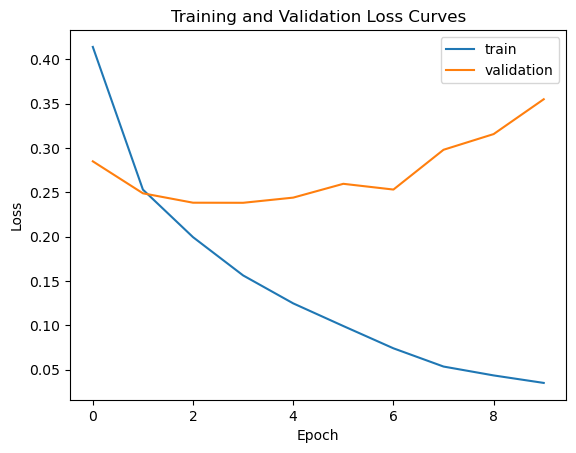

In [77]:
# Plot loss curves
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
# plt.grid(True)
plt.legend()

In [11]:
# Compute test accuracy
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.9208


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


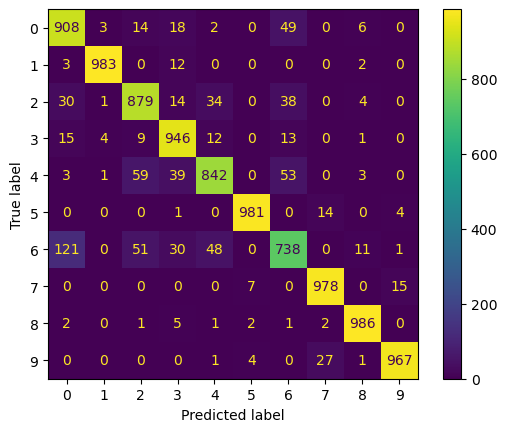

In [12]:
# Generate a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()
plt.show()

In [49]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.87      1000
           3       0.89      0.95      0.92      1000
           4       0.90      0.84      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.83      0.74      0.78      1000
           7       0.96      0.98      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [13]:
# Model 2
# Pick appropriate loss function and optimizer

from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Input(shape=(28, 28, 1)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(Dropout(0.3))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 116s 309ms/step - accuracy: 0.7820 - loss: 0.6085 - val_accuracy: 0.8923 - val_loss: 0.3145
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 126s 336ms/step - accuracy: 0.9004 - loss: 0.2726 - val_accuracy: 0.9080 - val_loss: 0.2765
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 124s 330ms/step - accuracy: 0.9224 - loss: 0.2086 - val_accuracy: 0.9140 - val_loss: 0.2427
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 114s 303ms/step - accuracy: 0.9369 - loss: 0.1710 - val_accuracy: 0.9177 - val_loss: 0.2272
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 113s 302ms/step - accuracy: 0.9508 - loss: 0.1330 - val_accuracy: 0.9220 - val_loss: 0.2198
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 114s 305ms/step - accuracy: 0.9601 - loss: 0.1088 - val_accuracy: 0.9173 - val_loss: 0.2359
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 109s 291ms/step - accuracy: 0.9666 - loss: 0.0902 - val_accuracy: 0.9193 - val_loss: 0.2333
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 108s 287ms/step - accuracy: 0.9744 -

In [45]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,305,632 (27.87 MB)

 Trainable params: 2,435,210 (9.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,870,422 (18.58 MB)

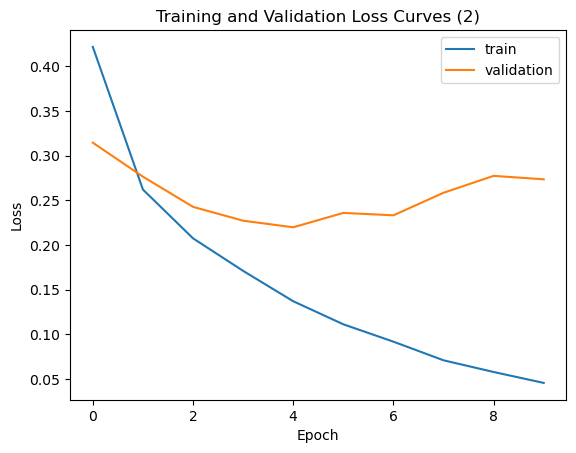

In [14]:
# Plot loss curves
plt.plot(history2.history["loss"], label="train")
plt.plot(history2.history["val_loss"], label="validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves (2)')
# plt.grid(True)
plt.legend()

In [15]:
# Compute test accuracy
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy2:.4f}')

Test accuracy: 0.9221


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


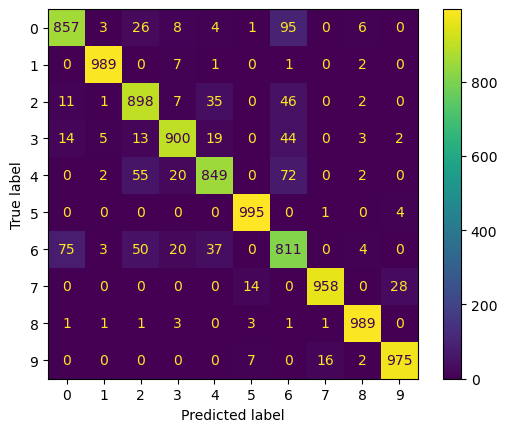

In [16]:
# Generate a confusion matrix
y_pred_probs_2 = model2.predict(x_test)
y_pred_2 = np.argmax(y_pred_probs_2, axis=1)
cm_2 = confusion_matrix(y_test, y_pred_2)
cmd_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
cmd_2.plot()
plt.show()

In [51]:
report_2 = classification_report(y_test, y_pred_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.90      0.88      1000
           3       0.93      0.90      0.92      1000
           4       0.90      0.85      0.87      1000
           5       0.98      0.99      0.99      1000
           6       0.76      0.81      0.78      1000
           7       0.98      0.96      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [17]:
# Model 3
# Pick appropriate loss function and optimizer
model3 = Sequential()
model3.add(Input(shape=(28, 28, 1)))
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(Dropout(0.3))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history3 = model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 112ms/step - accuracy: 0.7619 - loss: 0.6593 - val_accuracy: 0.8842 - val_loss: 0.3318
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.8938 - loss: 0.3009 - val_accuracy: 0.8885 - val_loss: 0.3108
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.9110 - loss: 0.2448 - val_accuracy: 0.9091 - val_loss: 0.2592
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.9251 - loss: 0.2066 - val_accuracy: 0.9139 - val_loss: 0.2411
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9358 - loss: 0.1762 - val_accuracy: 0.9153 - val_loss: 0.2384
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.9459 - loss: 0.1461 - val_accuracy: 0.9191 - val_loss: 0.2339
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9528 - loss: 0.1283 - val_accuracy: 0.9222 - val_loss: 0.2295
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.9587 - loss: 0.

In [47]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,599,648 (13.73 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,399,766 (9.15 MB)

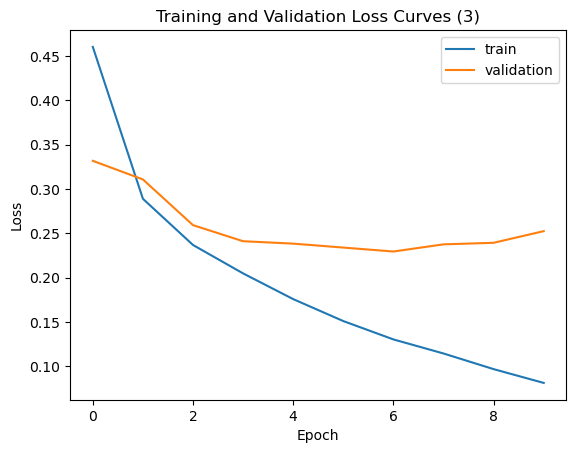

In [18]:
# Plot loss curves
plt.plot(history3.history["loss"], label="train")
plt.plot(history3.history["val_loss"], label="validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves (3)')
# plt.grid(True)
plt.legend()

In [19]:
# Compute test accuracy
loss3, accuracy3 = model3.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy3:.4f}')

Test accuracy: 0.9174


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


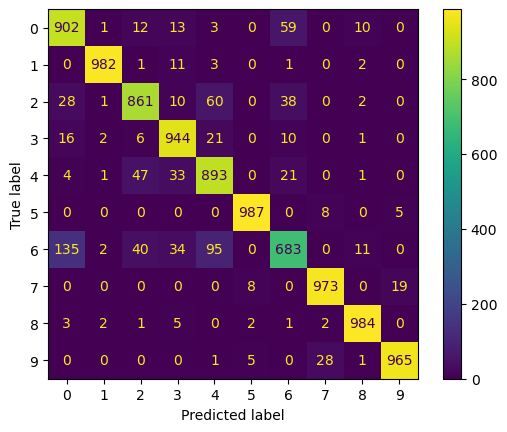

In [20]:
# Generate a confusion matrix
y_pred_probs_3 = model3.predict(x_test)
y_pred_3 = np.argmax(y_pred_probs_3, axis=1)
cm_3 = confusion_matrix(y_test, y_pred_3)
cmd_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3)
cmd_3.plot()
plt.show()

In [53]:
report_3 = classification_report(y_test, y_pred_3)
print(report_3)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.86      0.88      1000
           3       0.90      0.94      0.92      1000
           4       0.83      0.89      0.86      1000
           5       0.99      0.99      0.99      1000
           6       0.84      0.68      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [73]:
# Compute accuracy, precision, recall, and F1 score for all three models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score_1 = accuracy_score(y_test, y_pred)
accuracy_score_2 = accuracy_score(y_test, y_pred_2)
accuracy_score_3 = accuracy_score(y_test, y_pred_3)
print("Model 1 (baseline model) Accuracy Score:", round(accuracy_score_1, 4))
print("Model 2 (add a dropout with the dropout rate of 0.3) Accuracy Score:", round(accuracy_score_2, 4))
print("Model 3 (change the number of filters from 64 and 128 to 32 and 64) Accuracy Score:", round(accuracy_score_3, 4))
print("\n")

precision_score_1 = precision_score(y_test, y_pred, average='weighted')
precision_score_2 = precision_score(y_test, y_pred_2, average='weighted')
precision_score_3 = precision_score(y_test, y_pred_3, average='weighted')
print("Model 1 (baseline model) Precision Score:", round(precision_score_1, 4))
print("Model 2 (add a dropout with the dropout rate of 0.3) Precision Score:", round(precision_score_2, 4))
print("Model 3 (change the number of filters from 64 and 128 to 32 and 64) Precision Score:", round(precision_score_3, 4))
print("\n")

recall_score_1 = recall_score(y_test, y_pred, average='weighted')
recall_score_2 = recall_score(y_test, y_pred_2, average='weighted')
recall_score_3 = recall_score(y_test, y_pred_3, average='weighted')
print("Model 1 (baseline model) Recall Score:", round(recall_score_1, 4))
print("Model 2 (add a dropout with the dropout rate of 0.3) Recall Score:", round(recall_score_2, 4))
print("Model 3 (change the number of filters from 64 and 128 to 32 and 64) Recall Score:", round(recall_score_3, 4))
print("\n")

f1_score_1 = f1_score(y_test, y_pred, average='weighted')
f1_score_2 = f1_score(y_test, y_pred_2, average='weighted')
f1_score_3 = f1_score(y_test, y_pred_3, average='weighted')
print("Model 1 (baseline model) F1-score Score:", round(f1_score_1, 4))
print("Model 2 (add a dropout with the dropout rate of 0.3) F1-score Score:", round(f1_score_2, 4))
print("Model 3 (change the number of filters from 64 and 128 to 32 and 64) F1-score Score:", round(f1_score_3, 4))

Model 1 (baseline model) Accuracy Score: 0.9208
Model 2 (add a dropout with the dropout rate of 0.3) Accuracy Score: 0.9221
Model 3 (change the number of filters from 64 and 128 to 32 and 64) Accuracy Score: 0.9174


Model 1 (baseline model) Precision Score: 0.9206
Model 2 (add a dropout with the dropout rate of 0.3) Precision Score: 0.9232
Model 3 (change the number of filters from 64 and 128 to 32 and 64) Precision Score: 0.9174


Model 1 (baseline model) Recall Score: 0.9208
Model 2 (add a dropout with the dropout rate of 0.3) Recall Score: 0.9221
Model 3 (change the number of filters from 64 and 128 to 32 and 64) Recall Score: 0.9174


Model 1 (baseline model) F1-score Score: 0.9201
Model 2 (add a dropout with the dropout rate of 0.3) F1-score Score: 0.9224
Model 3 (change the number of filters from 64 and 128 to 32 and 64) F1-score Score: 0.9162


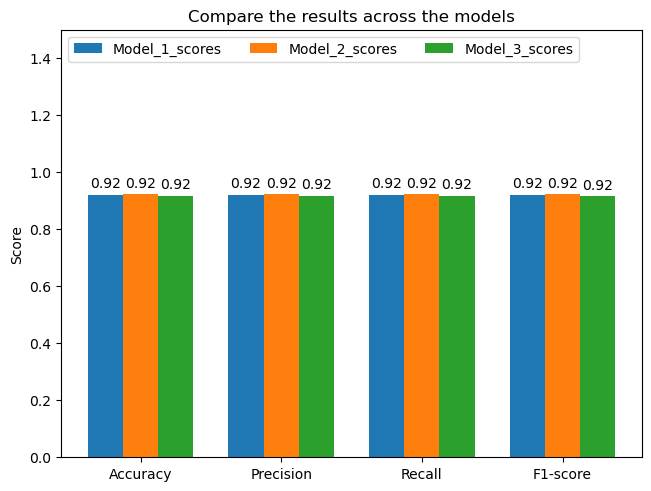

In [71]:
# Compare the results across the models in a graphical format
import numpy as np


metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
scores = {
    "Model_1_scores": [accuracy_score_1, precision_score_1, recall_score_1, f1_score_1],
    "Model_2_scores": [accuracy_score_2, precision_score_2, recall_score_2, f1_score_2],
    "Model_3_scores": [accuracy_score_3, precision_score_3, recall_score_3, f1_score_3]
}

width = 0.25
i = 0
x_location = np.arange(len(metrics))

fig, ax = plt.subplots(layout='constrained')

for type, score_list in scores.items():
    bar = ax.bar(x_location + width * i, score_list, width, label=type)
    ax.bar_label(bar, padding = 3, labels=[f'{m:.2f}' for m in score_list])
    i += 1

# Set the range of y axis to 1.5 to keep space for the legend
ax.set_xticks(x_location + width, metrics)
ax.set_ylim(0, 1.5)
ax.legend(loc='upper left', ncols=3)
ax.set_ylabel('Score')
ax.set_title("Compare the results across the models")


plt.show()